# LOGISTIC REGRESSION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print('no.of passengers in original dataset :' + str(len(df))) 
# str(len(df)) *same


no.of passengers in original dataset :891


## 2 . analyzing data

##Data analyzing - creating different plot to check relationship between variables

Text(0.5, 1.0, 'analyzing surviver and non-surviver')

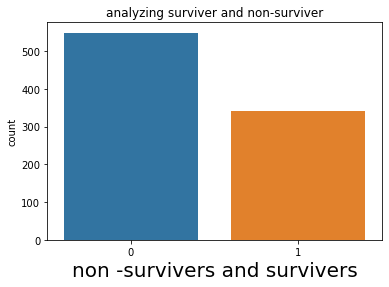

In [6]:
sns.countplot(x = 'Survived', data = df)
plt.xlabel('non -survivers and survivers' , fontsize = 20)
plt.title('analyzing surviver and non-surviver')


<AxesSubplot:xlabel='Survived', ylabel='count'>

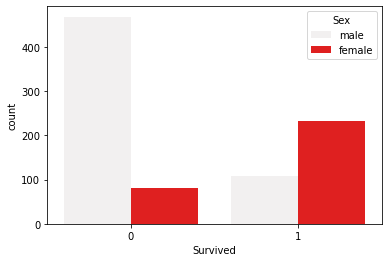

In [7]:
sns.countplot(x ='Survived' , hue = 'Sex' ,data = df , color = 'red')

<AxesSubplot:xlabel='Survived', ylabel='count'>

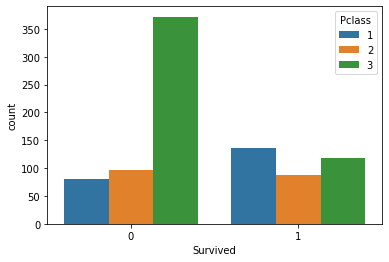

In [8]:
sns.countplot(x ='Survived' , hue = 'Pclass' ,data = df ) #pclass - passenger class
# op shows that 1 for firstclass , 2-second class ,3 - thirdclass
#output of x = 0 it shows that passangers didnot survive is majorly in thirdclass(cheapest price class in titanic)
#output of x = 1 it shows that the passangers who survived in majorily in firstclass

## age analysis

Text(0.5, 0, 'AGE OF PASSENGERS')

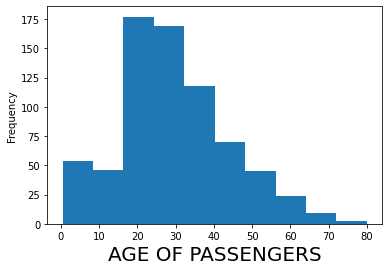

In [9]:
df.Age.plot.hist()
plt.xlabel('AGE OF PASSENGERS', fontsize = 20)


<AxesSubplot:>

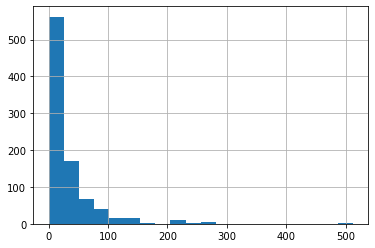

In [10]:
df.Fare.hist(bins= 20) 


##checking whether we have analysed all of the columns in the data or not

In [11]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

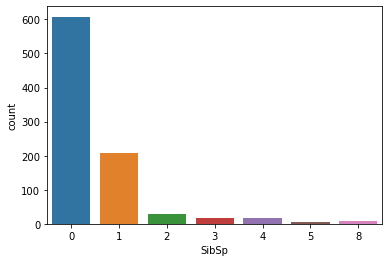

In [12]:
sns.countplot(x='SibSp' , data = df) #sibsp means sibling and spouse
# op shows maximum value on 0 therefore we conclude that neiter a chidren nor a spouse are go in the titanic

<AxesSubplot:>

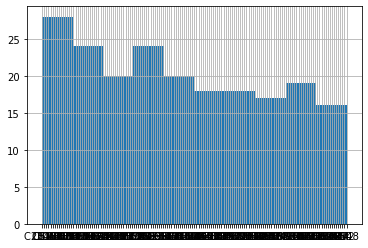

In [13]:
df.Cabin.hist() 


##  3 . DATA WRANGLING

##data wrangling means cleaning the data by removing the Nan and unnecessary columns in the dataset

In [14]:
df.isnull() #true - null , false - not null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum() #it prints the sum of the Nan values in the each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

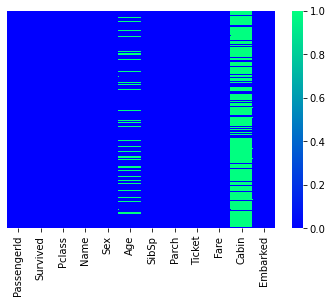

In [16]:
sns.heatmap(df.isnull(),yticklabels=False , cmap='winter')
# we can also write this code without (cmap='winter') this anyhow it shows result,(cmap='winter)but this line of code will provide 
# some colors it looks bit fancy.note:if (cmap='ntg') u write thw code like this it shows error and at the last of the error it shows
# some colors and design like 'winter' which we used here
# shows that age and cabin column has null vallues, cabin has more null value than age

In [17]:
# to remove missing values we can either replace the values and we canput in some dummy values or we can simply drop the column

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

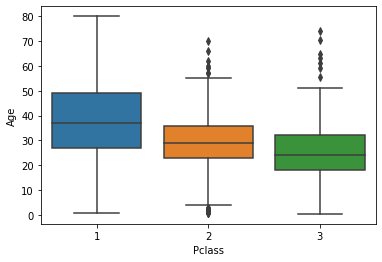

In [18]:
sns.boxplot(x='Pclass',y = 'Age' ,data = df )
# the op shows that age of the 1 and 2 class seems older than the 3 class (u can also change the x axis as age and y axis as 
# pclass but it seams messy thats why we chose these)                                                                       

In [19]:
#dropping cabin column
df.drop("Cabin" , axis=1 , inplace = True)

# or * newdf = df.drop(columns = ['Cabin'])
#newdf


In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
df.dropna(inplace = True)  #droping all the nan values .We can also place mean value in null values

<AxesSubplot:>

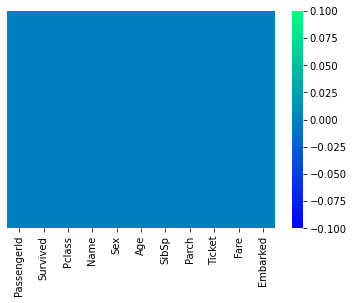

In [22]:
sns.heatmap(df.isnull() , yticklabels=False , cmap='winter' )

# or * sns.heatmap(df.isnull() , yticklabels=False , cbar=False )
# we are checking is there any null value or not ...the op shows that there is no null values ...

In [23]:
df.isnull().sum()  #checking

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## DUMMY VARIABLES

##WE CAN SEE MANY STRING VALUES IE ALPHABETS IN OUR DATA , WE JUST NEED TO CHANGE IT IN CATEGORICAL VALUES IE 0 AND 1...INORDRE
##TO IMPLEMENT LOGISTIC REGRESSION ...SO WE NEED TO CONVERT THIS CATEOGRAICAL VARIABLES TO DUMMY VARIABLES AND THIS CAN BE DONE WITH
##PANDAS.WHEN WE ARE DOING MACHINE LEARNING WE NEED TO MAKE SURE THAT THERE IS NO STRING VALUES IN OUR DATA..BECAUSE IT WONT TAKE
##THIS STRING VALUE AS AN INPUT VARIABLES

In [24]:
pd.get_dummies(df.Sex)
# in female column 0 stands for male and 1 stands for female
# simillarily , 
# in male column 0 stands for female and 1 stands for male
# we dont need both columns because one column is enough to tell us whether it is a male or female
# so drop any of these colum and keep 1 coulumn

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [25]:
# dummy variable for sex variable
sex =pd.get_dummies(df.Sex ,drop_first = 'True' )
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
# dummy variable for embarked variable

embark =pd.get_dummies(df.Embarked)
embark.head()
# here also the last 2 columns are enough 

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [27]:
embark =pd.get_dummies(df.Embarked ,drop_first = 'True' )
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [28]:
#do the same thing for pclass variable
pclass =pd.get_dummies(df.Pclass ,drop_first = 'True' )
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


##now we have made the values as categorical
##now our next step is to concoridate all the new rows into a dataset --> -->


In [29]:
df = pd.concat( [df , sex , embark, pclass] , axis = 1)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [31]:
# drop the column which we dont want
# df = df.drop( ['Sex' , 'Embarked' , 'PassengerId' , 'Name' , 'Ticket' ,'Pclass'] ,axis = 1 ,inplace = True )

# op now we have converted embaded variable into s and q AND gender as male AND passanger class as 2 and 3 this process is known 
# as data cleaning

## label encoder alternative way

In [32]:
# from sklearn.preprocessing import LabelEncoder

# sex_n = LabelEncoder()
# parch_n = LabelEncoder()
# pclass_n = LabelEncoder()

# tit.Sex = sex_n.fit_transform(tit.Sex)
# tit.Parch = parch_n.fit_transform(tit.Parch)
# tit.Pclass = pclass_n.fit_transform(tit.Pclass)


## TRAIN DATA

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = df.drop(['Survived' , 'Name' , 'Ticket' , "Sex" , 'Embarked'] , axis =1)
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,3,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,3,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,886,3,39.0,0,5,29.1250,0,1,0,0,1
886,887,2,27.0,0,0,13.0000,1,0,1,1,0
887,888,1,19.0,0,0,30.0000,0,0,1,0,0
889,890,1,26.0,0,0,30.0000,1,0,0,0,0


In [35]:
y =df['Survived']
y.head(7)

0    0
1    1
2    1
3    1
4    0
6    0
7    0
Name: Survived, dtype: int64

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3 )

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()

In [39]:
x_train.shape ,y_train.shape

((498, 11), (498,))

In [40]:

lr.fit(x_train , y_train )

C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = lr.predict(x_test)
y_pred.reshape(-1 ,1 )

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [42]:
from sklearn.metrics import classification_report
classification_report(y_test , y_pred )

'              precision    recall  f1-score   support\n\n           0       0.84      0.89      0.86       132\n           1       0.81      0.72      0.76        82\n\n    accuracy                           0.83       214\n   macro avg       0.82      0.81      0.81       214\nweighted avg       0.83      0.83      0.82       214\n'

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , y_pred)

array([[118,  14],
       [ 23,  59]], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8271028037383178

In [45]:
lr.score(x_test , y_test)

0.8271028037383178

# predicting new value

In [46]:
lr.predict([[4,3,35,0,0,8.0,5,0,0,1,0]])

array([0], dtype=int64)